In [1]:
import pandas as pd
import numpy as np

In [15]:
iris = pd.read_csv('iris.data')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.assign(sepal_ratio = lambda x : (x.SepalWidth / x.SepalLength)).sort_values('sepal_ratio', ascending=False).head()
# iris.assign(sepal_ratio = lambda x : f"{(x.SepalWidth)}".head()
# assign에서는 column명에 quotation(" ")을 하지 않는다.(**kwarg)
# assign은 잠정적으로 column를 만든다. 
# assign() always returns a copy of the data, leaving the original DataFrame untouched.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
32,5.2,4.1,1.5,0.1,Iris-setosa,0.788462
22,4.6,3.6,1.0,0.2,Iris-setosa,0.782609
15,5.7,4.4,1.5,0.4,Iris-setosa,0.771930
33,5.5,4.2,1.4,0.2,Iris-setosa,0.763636
46,5.1,3.8,1.6,0.2,Iris-setosa,0.745098


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

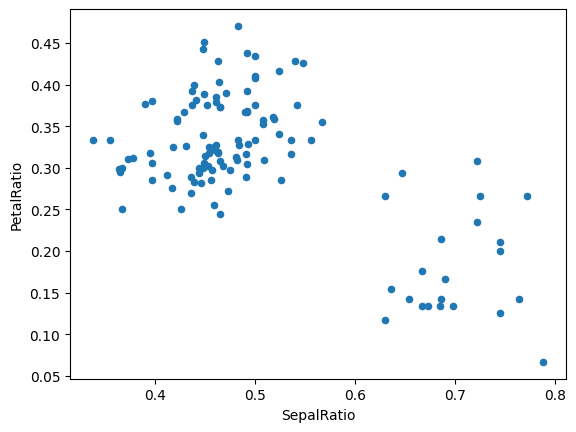

In [26]:
(
    iris.query('SepalLength > 5')
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind='scatter', x='SepalRatio', y='PetalRatio')
)

In [27]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [3]:
# Data alignment and arithmetic
import pandas as pd

df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [4]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [7]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [5]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [6]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [8]:
baseball = pd.read_csv('baseball.csv')
print(baseball)

       id     player  year  stint team  lg    g   ab   r    h  ...   rbi   sb  \
0   88641  womacto01  2006      2  CHN  NL   19   50   6   14  ...   2.0  1.0   
1   88643  schilcu01  2006      1  BOS  AL   31    2   0    1  ...   0.0  0.0   
2   88645  myersmi01  2006      1  NYA  AL   62    0   0    0  ...   0.0  0.0   
3   88649  helliri01  2006      1  MIL  NL   20    3   0    0  ...   0.0  0.0   
4   88650  johnsra05  2006      1  NYA  AL   33    6   0    1  ...   0.0  0.0   
..    ...        ...   ...    ...  ...  ..  ...  ...  ..  ...  ...   ...  ...   
95  89525  benitar01  2007      2  FLO  NL   34    0   0    0  ...   0.0  0.0   
96  89526  benitar01  2007      1  SFN  NL   19    0   0    0  ...   0.0  0.0   
97  89530  ausmubr01  2007      1  HOU  NL  117  349  38   82  ...  25.0  6.0   
98  89533   aloumo01  2007      1  NYN  NL   87  328  51  112  ...  49.0  3.0   
99  89534  alomasa02  2007      1  NYN  NL    8   22   1    3  ...   0.0  0.0   

     cs  bb    so  ibb  hbp

In [9]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

In [10]:
print(baseball.iloc[-20:, :12].to_string())
# Render a DataFrame to a console-friendly tabular output.

       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b
80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0
92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40   

In [13]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.322955,-0.484386,1.238533,-0.651260,0.767724,0.601387,-0.678000,0.604096,1.143679,0.815492,0.858878,-0.705021
1,-0.807745,0.267062,-0.683817,0.808312,-0.139592,0.967494,-0.048210,1.746901,0.967255,0.229421,-0.373054,0.064874
2,-0.280503,1.355048,-0.161862,-0.698139,-0.219647,-1.100311,-0.072216,0.888797,-0.654418,-0.353919,-0.944640,0.022250


In [20]:
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 2)
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,...,8,9,10,11
0,0.482813,-0.092607,0.432029,-1.924026,...,1.676212,0.772655,0.201697,-0.906698
...,...,...,...,...,...,...,...,...,...
2,1.602674,-0.906141,-1.241004,2.122769,...,0.853756,1.703329,0.056509,0.810839


In [23]:
pd.reset_option('display.max_columns')
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.320864,-0.096089,0.516447,0.397048,0.236183,1.233120,-1.317672,0.358251,-2.081297,2.485051,1.407658,2.824523
...,...,...,...,...,...,...,...,...,...,...,...,...
2,-0.271291,-0.351060,-0.111679,-0.431413,-0.385262,-1.368782,-0.564219,-0.322337,-2.258263,0.112711,0.006724,-1.165595
